In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
board_size=(4,4)

In [3]:
def read_image(fname):
    arr=imread(fname)
    print("Min and Max",arr.min(),arr.max())    
    
    if any(arr>1):  # if the image is read in as uint8, it's not 0-1 but 0-255, so scale it down
        print("Min and Max",arr.min(),arr.max())
        print("Scaling it down....")
        arr=arr/255
        print("Min and Max",arr.min(),arr.max())    
        
    if len(arr.shape)>2 and arr.shape[2]>3:  # alpha channel
        print("arr shape",arr.shape)
        print("Removing alpha channel")
        arr=arr[:,:,:3]
        print("new arr shape",arr.shape)
        
        
    arr=arr[30:260,45:310]  # change this for your image
    
    return arr

In [4]:
def get_square(arr,Nr,Nc,r,c,percent=100):
    image_rows,image_cols=arr.shape[:2]
    square_row=int(image_rows/Nr)
    square_col=int(image_cols/Nc)
    
    start_row=int(r*square_row)
    end_row=int((r+1)*square_row)

    start_col=int(c*square_col)
    end_col=int((c+1)*square_col)
    
    if percent==100:
        square=arr[start_row:end_row,start_col:end_col]
        
    else:
        dc=int((end_col-start_col)*(100-percent)/2.0/100.0)
        dr=int((end_row-start_row)*(100-percent)/2.0/100.0)

        square=arr[start_row+dr:end_row-dr,start_col+dc:end_col-dc]
        
        
    return square

def get_square_size(arr,Nr,Nc,r,c,size=None):
    image_rows,image_cols=arr.shape[:2]
    square_row=int(image_rows/Nr)
    square_col=int(image_cols/Nc)

    start_row=int(r*square_row)
    end_row=int((r+1)*square_row)

    start_col=int(c*square_col)
    end_col=int((c+1)*square_col)

    if size is None:
        square=arr[start_row:end_row,start_col:end_col]
    else:
        start_row=int(start_row+(end_row-start_row)/2.0-size[0]/2.0)
        start_col=int(start_col+(end_col-start_col)/2.0-size[1]/2.0)

        square=arr[start_row:start_row+size[0],start_col:start_col+size[1]]


    return square

Min and Max 5 236
Min and Max 5 236
Scaling it down....
Min and Max 0.0196078431372549 0.9254901960784314


Text(0.5,1,'Image Size: 230,265')

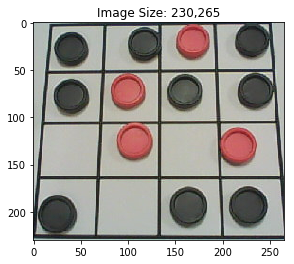

In [5]:
fname='robot images/test9.jpg'
count=1
arr=read_image(fname)
imshow(arr)
title('Image Size: %d,%d' % (arr.shape[0],arr.shape[1]))

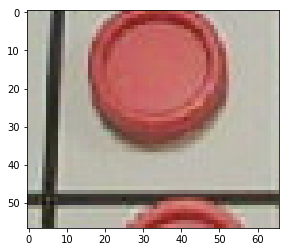

In [6]:
small_square=get_square_size(arr,
                             board_size[0],board_size[1],
                             1,1)
imshow(small_square)

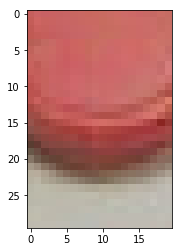

In [7]:
small_square=get_square_size(arr,
                             board_size[0],board_size[1],
                             1,1,
                            (30,20))
imshow(small_square)

In [8]:
class_names=['white','red','black']

boards={}

boards['robot images/test3.jpg']="""
0 1 0 1
1 0 1 0 
0 1 0 1
0 1 0 1
"""

boards['robot images/test1.jpg']="""
1 1 1 1
1 1 1 1 
1 1 1 1
1 1 1 1
"""

boards['robot images/test5.jpg']="""
2 2 2 2
2 2 2 2 
2 2 2 2
2 2 2 2
"""


In [12]:
from Game import Board
from imageio import imwrite
import os
from glob import glob

Min and Max 1 233
Min and Max 1 233
Scaling it down....
Min and Max 0.00392156862745098 0.9137254901960784
 0  1  0  1 
 1  0  1  0 
 0  1  0  1 
 0  1  0  1 

Saving  training_pieces/white/piece0.png
Saving  training_pieces/red/piece1.png
Saving  training_pieces/white/piece2.png
Saving  training_pieces/red/piece3.png
Saving  training_pieces/red/piece4.png
Saving  training_pieces/white/piece5.png
Saving  training_pieces/red/piece6.png
Saving  training_pieces/white/piece7.png
Saving  training_pieces/white/piece8.png
Saving  training_pieces/red/piece9.png
Saving  training_pieces/white/piece10.png
Saving  training_pieces/red/piece11.png
Saving  training_pieces/white/piece12.png
Saving  training_pieces/red/piece13.png
Saving  training_pieces/white/piece14.png
Saving  training_pieces/red/piece15.png
Min and Max 2 238
Min and Max 2 238
Scaling it down....
Min and Max 0.00784313725490196 0.9333333333333333
 1  1  1  1 
 1  1  1  1 
 1  1  1  1 
 1  1  1  1 

Saving  training_pieces/red/piece1

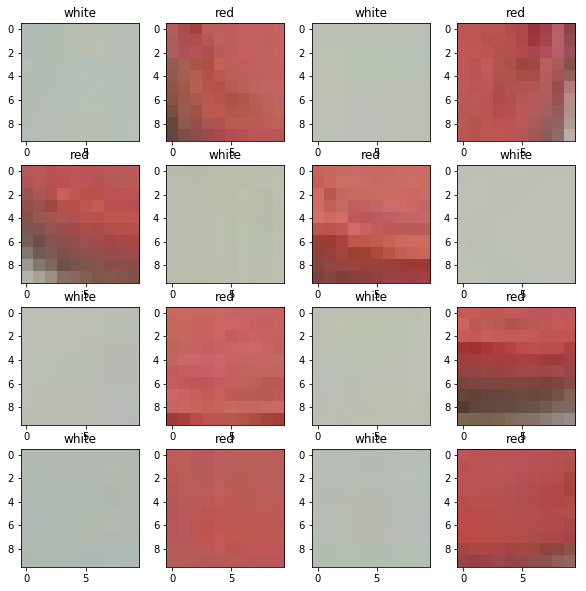

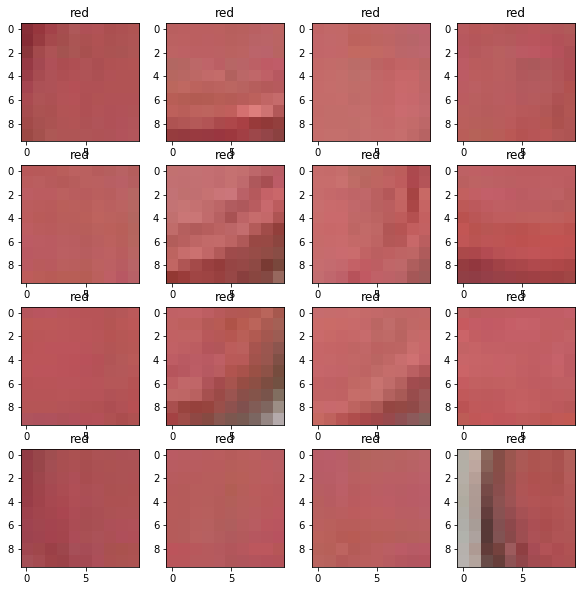

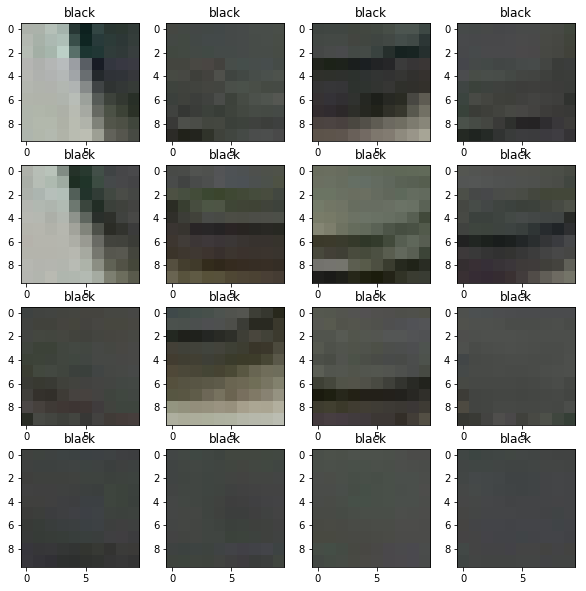

In [27]:
board_size=(4,4)
small_square_size=(10,10)

if not os.path.exists('training_pieces'):
    os.mkdir('training_pieces')
    
for name in class_names:
    dirname='training_pieces/%s' % name
    if not os.path.exists(dirname):
        print("Making ",dirname)
        os.mkdir(dirname)
    

filenames={}
for name in class_names:
    filenames[name]=[]

count=0
for image_filename in boards:
    board=boards[image_filename]
    arr=read_image(image_filename)
    
    state=Board(4,4)
    state.board=[int(_) for _ in board.split()]    

    print(state)
    
    nr,nc=state.shape
    
    figure(figsize=(10,10))
    for r in range(nr):
        for c in range(nc):
            subplot(nr,nc,count%(nc*nr)+1)
            square=get_square_size(arr,board_size[0],board_size[1],r,c,small_square_size)
            imshow(square)
            name=class_names[state[r,c]]
            title(name)
            dirname='training_pieces/%s' % name
            fname='%s/piece%d.png' % (dirname,count)
            print("Saving ",fname)
            imwrite(fname,(square*255).astype(uint8))
            count+=1    
            filenames[name].append(fname)
            


In [31]:
for name in class_names:
    gnames=glob('training_pieces/%s/*.*' % name)
    gnames=[_ for _ in gnames if 'desktop.ini' not in _.lower()]
    fnames=filenames[name]
    for fname in fnames:
        gnames.remove(fname)
        
    if gnames:
        raise ValueError("Warning: Extra files in the folder.  Consider deleting the folder and rerunning.",gnames)


ValueError: ('Warning: Extra files in the folder.  Consider deleting the folder and rerunning.', ['training_pieces/red/piece4 copy.png'])